In [1]:
import re
import requests
from bs4 import BeautifulSoup

from PIL import Image

import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = "https://www.transfermarkt.com/erling-haaland/profil/spieler/418560"
player_id = url.split('/')[-1]

In [3]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36 Edg/120.0.0.0"
}

In [4]:
response = requests.get(url, headers=headers)

In [5]:
response.status_code

200

In [6]:
soup = BeautifulSoup(response.content, "html.parser")

In [7]:
player_name = soup.select_one('h1[class="data-header__headline-wrapper"]').text.split('\n')[-1].strip()

In [8]:
player_number = soup.select_one('span[class="data-header__shirt-number"]').text.replace('#', '').strip()

In [9]:
int(player_number)

9

In [10]:
player_club = soup.select_one('span[class="data-header__club"]').text.split('\n')[-1].strip()

In [11]:
# Get the nationality stuff
player_nationality_data = soup.select('span[class="data-header__content"]')[-1].select_one('img')

# Get the country name
player_nationality = player_nationality_data.get("title")

# Get the country img
nation_img = player_nationality_data.get('src')
response_nation = requests.get(nation_img)
nation_tag = player_nationality + '.jpg'
with open(nation_tag, 'wb') as f:
        f.write(response_nation.content)

In [12]:
# Load and scrape the image
player_img = soup.select_one(f'img[title="{player_name}"]').get('src')
response_img = requests.get(player_img)
img_tag = player_name + '.jpg'
with open(img_tag, 'wb') as f:
        f.write(response_img.content)

In [76]:
# Load transfer fee data
# ptt = soup.find('div', class_="tm-transfer-history box ")

# if ptt:
#     pt = soup.find_all('div', class_='grid tm-player-transfer-history-grid')

# else:
#     print(f"Div with class 'your_div_class' not found.")
# player_transfer_df = soup.select_one('div[class="grid tm-player-transfer-history-grid"]')

# ptli = soup.select('a[class="grid__cell grid__cell--center tm-player-transfer-history-grid__link"]')

# ptliw = soup.find('a', class_="grid__cell grid__cell--center tm-player-transfer-history-grid__link").strip()

ptliweb = soup.select('tm-transfer-history')

ptli = soup.select('div[class="grid tm-player-transfer-history-grid tm-player-transfer-history-grid tm-player-transfer-history-grid--heading"]')
ptli

[]

In [13]:
player_contract_expiry = re.search("Contract expires: .*__content\">(.*?)</span>", str(soup)).group(1)

In [14]:
player_contract_expiry

'Jun 30, 2027'

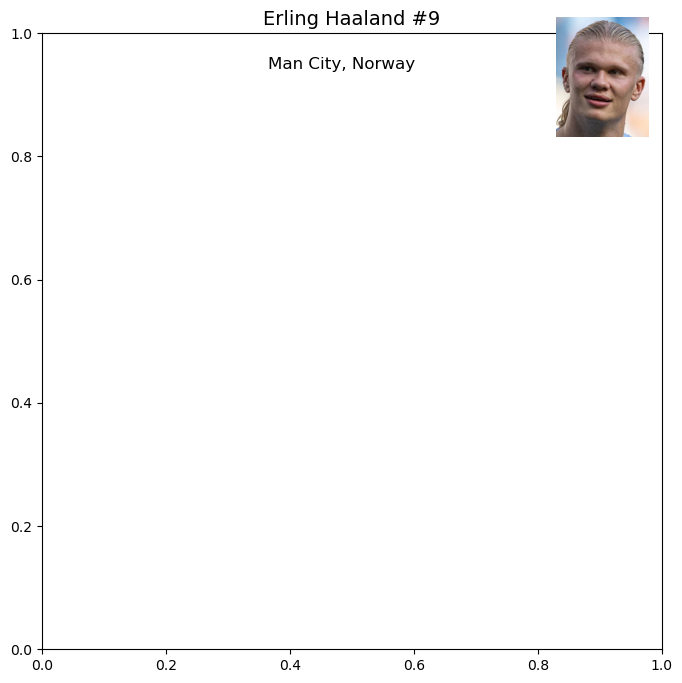

In [17]:
def create_player_profile(player_name, img_path):
    # attributes = list(player_data.keys())
    # values = list(player_data.values())

    # Set up the radar chart
    fig, ax = plt.subplots(figsize=(8, 8))##, subplot_kw=dict(polar=True))
    #ax.fill(attributes, values, alpha=0.25)

    # Add labels
    ax.set_title(player_name + " #" + player_number, fontsize=14)
    # ax.set_xticks(np.arange(len(attributes)) * (2 * np.pi) / len(attributes))
    # ax.set_xticklabels(attributes)

    # Load and display the image
    img = Image.open(img_path)

    axins = fig.add_axes([0.75, 0.75, 0.15, 0.15])  # Add a small axis for the image
    axins.imshow(img)

    # Set limits to control the size of the image
    #axins.set_xlim(0, img.width)
    #axins.set_ylim(0, img.height)

    #ax.axis('off')
    axins.axis('off')  # Turn off the axis for the image

    plt.suptitle(f"{player_club}, {player_nationality}", fontsize=12, y=0.85)

    plt.show()

image_path = img_tag  # Replace with the actual path to your image

create_player_profile(player_name, image_path)
